# Interpreting Data

In [2]:
import pandas as pd
import numpy as np

houses = pd.read_csv("../housing_data.csv")

In [2]:
houses["price"].mean()

540088.1417665294

In [4]:
houses[["sqft_living","price"]].median()

sqft_living      1910.0
price          450000.0
dtype: float64

In [6]:
houses[["sqft_living","price"]].describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


In [8]:
houses[["bedrooms","price"]].groupby("bedrooms").mean()

,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


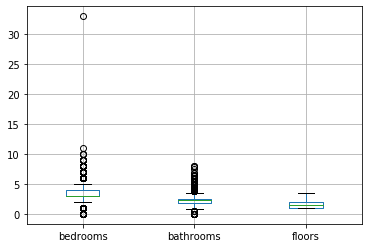

In [10]:
houses.boxplot(column=["bedrooms","bathrooms","floors"])

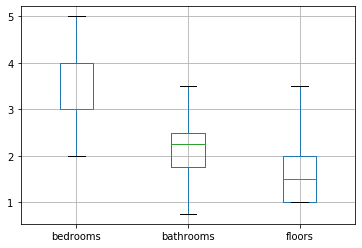

In [11]:
houses.boxplot(column=["bedrooms","bathrooms","floors"], showfliers=False)